In [29]:
# !pip install --upgrade pip
!pip install ../..
!pip install findspark

Processing /home/thesis_nikoletos_1/pyJedAI-Dev
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyjedai: filename=pyjedai-0.0.10-py3-none-any.whl size=119997 sha256=9a63e3871fa07cd506b1d620b77ae9d66aa45b0042c8de3ff0595e443397e779
  Stored in directory: /home/thesis_nikoletos_1/.cache/pip/wheels/2e/82/bd/dbb8eefcf923514550a5419e9dae3907bbbe22e2c86b0a8d72
Successfully built pyjedai
  Attempting uninstall: pyjedai
    Found existing installation: pyjedai 0.0.10
    Uninstalling pyjedai-0.0.10:
      Successfully uninstalled pyjedai-0.0.10
^C


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys
import pandas as pd
import networkx
from networkx import draw, Graph
import importlib
import findspark

import nltk
# nltk.download('stopwords')

from nltk.corpus import stopwords
# stopwords_path = nltk.data.find('corpora/stopwords')

findspark.init()

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"


In [4]:
from pyjedai.datamodel import Data
from pyjedai.evaluation import Evaluation

In [5]:

from pyspark import SparkConf, SparkContext


# Configure Spark to use more driver memory and executor memory
conf = SparkConf().setAppName('PyJedAI').setMaster('local[10]')
conf.set("spark.executor.memory", "48g")
conf.set("spark.driver.memory","8g")
conf.set("spark.executor.cores","24")
conf.set("spark.dynamicAllocation.enabled","true")
conf.set("spark.serializer", "org.apache.spark.serializer.KryoSerializer")
conf.set("spark.kryoserializer.buffer.max", "2047m")
conf.set("spark.kryoserializer.buffer", "1024m")
# conf.set("spark.rdd.compress", "true")
# conf.set("spark.memory.fraction","0.4")


# Set JVM options for garbage collection
jvm_options = "-XX:+UseG1GC -XX:MaxGCPauseMillis=200"
# You can adjust these JVM options according to your needs

# Export SPARK_OPTS environment variable with JVM options
import os
os.environ['SPARK_OPTS'] = jvm_options

# Enable compression of RDD data
# conf.set("spark.serializer", "org.apache.spark.serializer.KryoSerializer")

# Create a SparkContext with the configured properties
sc = SparkContext(conf=conf)


25/01/18 20:46:48 WARN Utils: Your hostname, pyravlos5 resolves to a loopback address: 127.0.1.1; using 88.197.53.173 instead (on interface eno1)
25/01/18 20:46:48 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/01/18 20:46:50 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [6]:
from pyjedai.datamodel import Data

import pandas as pd

# Clean - Clean Basic

# d1 = pd.read_csv("./../data/ccer/D2/abt.csv", sep='|', engine='python', na_filter=False)
# d2 = pd.read_csv("./../data/ccer/D2/buy.csv", sep='|', engine='python', na_filter=False)
# gt = pd.read_csv("./../data/ccer/D2/gt.csv", sep='|', engine='python')

# data = Data(dataset_1=d1,
#             id_column_name_1='id',
#             dataset_2=d2,
#             id_column_name_2='id',
#             ground_truth=gt)

# d1 = pd.read_csv("./../data/data_ea/data/real/D10(movies)/dbpedia.csv", sep='|', engine='python', na_filter=False)
# d2 = pd.read_csv("./../data/data_ea/data/real/D10(movies)/imdb.csv", sep='|', engine='python', na_filter=False, on_bad_lines='warn')

# gt = pd.read_csv("./../data/data_ea/data/real/D10(movies)/gtImDb.csv", sep='|', engine='python')

# data = Data(dataset_1=d1,
#             id_column_name_1='id',
#             dataset_2=d2,
#             id_column_name_2='id',
#             ground_truth=gt)




# d1 = pd.read_csv("./../data/der/cora/cora.csv", sep='|')
# gt = pd.read_csv("./../data/der/cora/cora_gt.csv", sep='|', header=None)
# attr = ['Entity Id','author', 'title']

# data = Data(
#     dataset_1=d1,
#     id_column_name_1='Entity Id',
#     ground_truth=gt,
#     attributes_1=attr
# )

d1 = pd.read_csv("./../data/data_ea/data/synthetic/profiles/10K.csv", sep='|', engine='python', na_filter=False)
gt = pd.read_csv("./../data/data_ea/data/synthetic/ground_truths/10Kduplicates.csv", sep='|', engine='python')

data = Data(dataset_1=d1,
        id_column_name_1='Id',
        ground_truth=gt)

# d1 = pd.read_csv("./../data/ccer/D2/abt.csv", sep='|', engine='python', na_filter=False)
# d2 = pd.read_csv("./../data/ccer/D2/buy.csv", sep='|', engine='python', na_filter=False)
# gt = pd.read_csv("./../data/ccer/D2/gt.csv", sep='|', engine='python')

# data = Data(dataset_1=d1,
#             id_column_name_1='id',
#             dataset_2=d2,
#             id_column_name_2='id',
#             ground_truth=gt)

FileNotFoundError: [Errno 2] No such file or directory: '../../data/data_ea/data/synthetic/profiles/10K.csv'

In [7]:
data.print_specs()

------------------------- Data -------------------------
Type of Entity Resolution:  Dirty
Dataset-1:
	Number of entities:  10000
	Number of NaN values:  0
	Attributes: 
		 ['given_name', 'surname', 'date_of_birth', 'address_1', 'address_2', 'street_number', 'postcode', 'soc_sec_id', 'suburb', 'phone_number', 'state', 'age']

Total number of entities:  10000
Number of matching pairs in ground-truth:  8705
-------------------------------------------------------- 



In [6]:
# shared_data.rdd_dataset_1.take(1)

In [ ]:
data.clean_dataset(remove_stopwords=False,
                   remove_punctuation=False,
                   remove_numbers=False,
                   remove_unicodes=False)

/home/conda/miniconda3/envs/spark_experiments/lib/python3.9/site-packages/pyjedai/datamodel.py:288: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.dataset_1 = self.dataset_1.applymap(lambda x: x.lower())


In [19]:
from pyjedai.block_building import (
    StandardBlocking,
    QGramsBlocking,
    ExtendedQGramsBlocking,
    SuffixArraysBlocking,
    ExtendedSuffixArraysBlocking,
)

from pyjedai.parallel.block_building_spark import (
    StandardBlockingSpark,
    QGramsBlockingSpark,
    ExtendedQGramsBlockingSpark,
    SuffixArraysBlockingSpark,
    ExtendedSuffixArraysBlockingSpark,
)


In [ ]:


bb1 = StandardBlocking()
# blocks_correct = bb1.build_blocks(data, attributes_1=['name'], attributes_2=['name'])
blocks_correct = bb1.build_blocks(data)
# print(len(blocks_correct))
# print(bb1.execution_time)
_ = bb1.evaluate(blocks_correct, with_classification_report=True)

Standard Blocking:   0%|          | 0/10000 [00:00<?, ?it/s]

***************************************************************************************************************************
                                         Μethod:  Standard Blocking
***************************************************************************************************************************
Method name: Standard Blocking
Parameters: 
Runtime: 2.0585 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      0.03% 
	Recall:        99.93%
	F1-score:       0.06%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 8699
	False positives: 28383015
	True negatives: 49986289
	False negatives: 6
	Total comparisons: 28391714
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [ ]:
bb = StandardBlockingSpark(sc)

# blocks = bb.build_blocks(data, attributes_1=['name'], attributes_2=['name'])

rdd_blocks = bb.build_blocks(data)
# _ = bb.evaluate(rdd_blocks, with_classification_report=True)



Standard Blocking Spark:   0%|          | 0/5 [00:00<?, ?it/s]

ParallelCollectionRDD[36] at readRDDFromFile at PythonRDD.scala:289


In [12]:
# # print(len(bb.blocks))
# my_min = int(bb.execution_time/60)
# my_sec = bb.execution_time%60

# print(my_min,"m ",my_sec,"s")
# print(bb1.execution_time)
# print(len(rdd_blocks) == len(blocks_correct))

# bb.report()
_ = bb.evaluate(rdd_blocks, with_classification_report=True)


# bb.blocks['cc2000'].entities_D2

***************************************************************************************************************************
                                         Μethod:  Standard Blocking Spark
***************************************************************************************************************************
Method name: Standard Blocking Spark
Parameters: 
Runtime: 10.2611 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      0.03% 
	Recall:        99.93%
	F1-score:       0.06%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 8699
	False positives: 28383015
	True negatives: 49986289
	False negatives: 6
	Total comparisons: 28391714
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [14]:
from pyjedai.block_cleaning import BlockFiltering

In [15]:
bf = BlockFiltering(ratio=0.5)
filtered_blocks = bf.process(blocks_correct, data, tqdm_disable=False)
filtered_blocks_rdd = bf.process(rdd_blocks, data, tqdm_disable=False)


Block Filtering:   0%|          | 0/3 [00:00<?, ?it/s]

Block Filtering:   0%|          | 0/3 [00:00<?, ?it/s]

In [16]:

# for key in filtered_blocks: 
#     if filtered_blocks[key].entities_D1 != filtered_blocks_rdd[key].entities_D1:
#         print(key)
        

print(filtered_blocks['6050'].entities_D1)
print(filtered_blocks_rdd['6050'].entities_D1)      




OrderedSet([0, 900, 7883, 2675, 2831, 6068, 5490, 8116, 7120, 4965, 7145, 4547, 4847, 6926])
OrderedSet([0, 7883, 6068, 2831, 900, 2675, 7120, 8116, 5490, 4965, 4847, 7145, 4547, 6926])


In [17]:
_ = bf.evaluate(filtered_blocks)
_ = bf.evaluate(filtered_blocks_rdd)

***************************************************************************************************************************
                                         Μethod:  Block Filtering
***************************************************************************************************************************
Method name: Block Filtering
Parameters: 
	Ratio: 0.5
Runtime: 1.6152 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      3.35% 
	Recall:        98.02%
	F1-score:       6.48%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
***************************************************************************************************************************
                                         Μethod:  Block Filtering
***************************************************************************************

In [43]:
for (id, rdd) in sc._jsc.getPersistentRDDs().items():
    rdd.unpersist()

In [18]:
from pyjedai.parallel.block_cleaning_spark import BlockFilteringSpark

In [22]:
bf = BlockFilteringSpark(sc,ratio=0.5)
filtered_blocks = bf.process(rdd_blocks, data, tqdm_disable=False)
bf.report()

Block Filtering Spark:   0%|          | 0/3 [00:00<?, ?it/s]

0


24/07/16 03:50:04 ERROR Executor: Exception in task 0.0 in stage 13.0 (TID 49)1]
org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/home/conda/miniconda3/envs/spark_experiments/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/home/conda/miniconda3/envs/spark_experiments/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/home/conda/miniconda3/envs/spark_experiments/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/home/conda/miniconda3/envs/spark_experiments/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
  File "/home/thesis_nikoletos_1/pyJedAI-Dev/src/pyjedai/parallel/utils_spark.p

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 13.0 failed 1 times, most recent failure: Lost task 0.0 in stage 13.0 (TID 49) (88.197.53.173 executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/home/conda/miniconda3/envs/spark_experiments/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/home/conda/miniconda3/envs/spark_experiments/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/home/conda/miniconda3/envs/spark_experiments/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/home/conda/miniconda3/envs/spark_experiments/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
  File "/home/thesis_nikoletos_1/pyJedAI-Dev/src/pyjedai/parallel/utils_spark.py", line 8, in <lambda>
    return rdd.filter(lambda entity: not block_with_one_entity(entity[1], is_dirty_er.value, d1_counter.value))
  File "/home/thesis_nikoletos_1/pyJedAI-Dev/src/pyjedai/parallel/utils_spark.py", line 43, in block_with_one_entity
    return True if ((is_dirty_er and len(block) == 1) or \
TypeError: object of type 'Block' has no len()

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD.$anonfun$collect$2(RDD.scala:1049)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2438)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2463)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1049)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1048)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:195)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/home/conda/miniconda3/envs/spark_experiments/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/home/conda/miniconda3/envs/spark_experiments/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/home/conda/miniconda3/envs/spark_experiments/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/home/conda/miniconda3/envs/spark_experiments/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
  File "/home/thesis_nikoletos_1/pyJedAI-Dev/src/pyjedai/parallel/utils_spark.py", line 8, in <lambda>
    return rdd.filter(lambda entity: not block_with_one_entity(entity[1], is_dirty_er.value, d1_counter.value))
  File "/home/thesis_nikoletos_1/pyJedAI-Dev/src/pyjedai/parallel/utils_spark.py", line 43, in block_with_one_entity
    return True if ((is_dirty_er and len(block) == 1) or \
TypeError: object of type 'Block' has no len()

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD.$anonfun$collect$2(RDD.scala:1049)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2438)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more


In [19]:
_ = bf.evaluate(filtered_blocks)


# print(len(filtered_blocks))
# from sys imp?ort getsizeof

# print(getsizeof(rdd_blocks.items()))

***************************************************************************************************************************
                                         Μethod:  Block Purging
***************************************************************************************************************************
Method name: Block Purging
Parameters: 
	Smoothing factor: 1.025
	Max Comparisons per Block: 13920
Runtime: 4.7298 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      0.24% 
	Recall:        99.81%
	F1-score:       0.48%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [29]:
from pyjedai.comparison_cleaning import (
    WeightedEdgePruning,
    WeightedNodePruning,
    CardinalityEdgePruning,
    CardinalityNodePruning,
    BLAST,
    ReciprocalCardinalityNodePruning,
    ReciprocalWeightedNodePruning,
    ComparisonPropagation
)

from pyjedai.parallel.comparison_cleaning_spark import (
    WeightedEdgePruningSpark,
    WeightedNodePruningSpark,
    CardinalityEdgePruningSpark,
    CardinalityNodePruningSpark,
    BLASTSpark,
    ReciprocalCardinalityNodePruningSpark,
    ReciprocalWeightedNodePruningSpark,
)

In [43]:
mb = ReciprocalWeightedNodePruning()
candidate_pairs_blocks = mb.process(filtered_blocks, data)
_ = mb.evaluate(candidate_pairs_blocks)


Reciprocal Weighted Node Pruning:   0%|          | 0/10000 [00:00<?, ?it/s]

***************************************************************************************************************************
                                         Μethod:  Reciprocal Weighted Node Pruning
***************************************************************************************************************************
Method name: Reciprocal Weighted Node Pruning
Parameters: 
	Node centric: True
	Weighting scheme: CN-CBS
Runtime: 15.4898 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     38.23% 
	Recall:        85.57%
	F1-score:      52.85%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [44]:
mbSpark = ReciprocalWeightedNodePruningSpark(sc,num_slices=2)
candidate_pairs_blocks_spark = mbSpark.process(filtered_blocks_rdd, data)
_ = mbSpark.evaluate(candidate_pairs_blocks_spark)


Reciprocal Weighted Node Pruning Spark:   0%|          | 0/10 [00:00<?, ?it/s]

10


***************************************************************************************************************************
                                         Μethod:  Reciprocal Weighted Node Pruning Spark
***************************************************************************************************************************
Method name: Reciprocal Weighted Node Pruning Spark
Parameters: 
	Node centric: True
	Weighting scheme: CN-CBS
Runtime: 5.5518 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     16.68% 
	Recall:        85.97%
	F1-score:      27.94%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [60]:
    
mbSpark = CardinalityEdgePruningSpark(sc,num_slices =20)
candidate_pairs_blocks_spark = mbSpark.process(rdd_blocks, data)

Cardinality Edge Pruning Spark:   0%|          | 0/10 [00:00<?, ?it/s]

60


In [49]:
# print(mbSpark._blocks)
# if 0 in mbSpark._nearest_entities:
    # print("OK")
    
# print(mbSpark._entity_index)

# attrs = dir(mbEvaluate)

# print(mbSpark._distinct_comparisons)
# 
# for i in mbSpark._nearest_entities:
#     if i not in mb._nearest_entities:
#         print(i)
#     if len(mbSpark._nearest_entities[i]) != len(mb._nearest_entities[i]):
#         print(i)
#         print(mbSpark._nearest_entities[i])
# print(sorted(mbSpark._blocks[key]))
# print(sorted(mb._blocks[key]))
        
# print(int(mbSpark._threshold))
# print(mb._top_k_edges)
# print(mbEvaluate)
# print(len(mb._blocks))

# for i in mbSpark._nearest_entities.keys():
    # if len(mbSpark._nearest_entities[i]) != len(mb._nearest_entities[i]):
        # print(i)

***************************************************************************************************************************
                                         Μethod:  Weighted Edge Pruning Spark
***************************************************************************************************************************
Method name: Weighted Edge Pruning Spark
Parameters: 
	Node centric: False
	Weighting scheme: CBS
Runtime: 2.5597 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     67.39% 
	Recall:        87.65%
	F1-score:      76.20%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
***************************************************************************************************************************
                                         Μethod:  Weighted Edge Pruning
*************************

In [35]:

_ = mb.evaluate(candidate_pairs_blocks)

***************************************************************************************************************************
                                         Μethod:  Cardinality Node Pruning
***************************************************************************************************************************
Method name: Cardinality Node Pruning
Parameters: 
	Node centric: True
	Weighting scheme: CBS
Runtime: 8.7147 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     20.08% 
	Recall:        90.45%
	F1-score:      32.86%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [20]:
mbSpark._top_k_edges.count()

15

In [23]:
mb._top_k_edges.qsize()

0

In [20]:
from pyjedai.parallel.matching_spark import EntityMatchingSpark
from pyjedai.matching import EntityMatching


In [25]:
em1 = EntityMatching()

pairs_graph1 = em1.predict(filtered_blocks, data)

Entity Matching (dice, white_space_tokenizer):   0%|          | 0/11070 [00:00<?, ?it/s]

In [27]:
em = EntityMatchingSpark(sc,
    num_slices = 30
)

pairs_graph = em.predict(filtered_blocks, data, tqdm_disable=True)

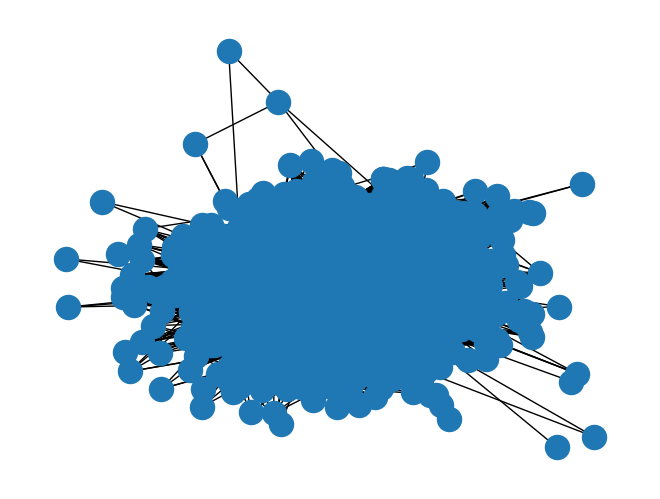

In [15]:
draw(pairs_graph)

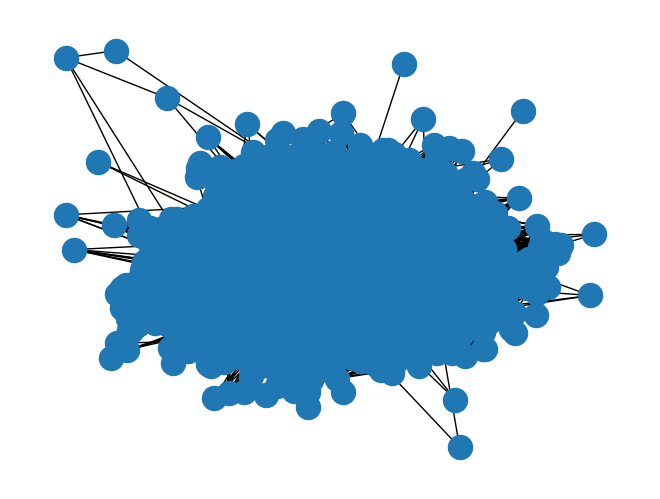

In [20]:
draw(pairs_graph1)

In [ ]:
# _ = em.evaluate(pairs_graph)
_ = em.evaluate(pairs_graph)
# print(em.execution_time)

In [ ]:
_ = em1.evaluate(pairs_graph1)
# print(em1.execution_time)


In [70]:
from pyjedai.clustering import ConnectedComponentsClustering, UniqueMappingClustering

In [71]:
ccc = UniqueMappingClustering()
clusters = ccc.process(pairs_graph, data, similarity_threshold=0.07)
print(clusters)

0.7083333333333333
Priority QUEUE len  :  11529
[{109, 1174}, {1142, 799}, {1176, 110}, {434, 1078}, {933, 1990}, {1736, 658}, {1322, 997}, {6, 1286}, {321, 1543}, {1161, 95}, {62, 1135}, {1609, 598}, {1347, 204}, {107, 1389}, {659, 1735}, {1328, 662}, {692, 1949}, {786, 1691}, {49, 1177}, {1785, 644}, {657, 1734}, {402, 1467}, {163, 1308}, {1466, 274}, {1043, 1798}, {1155, 47}, {1201, 794}, {2013, 70}, {971, 2036}, {289, 1417}, {1313, 154}, {1225, 796}, {1445, 271}, {1784, 609}, {420, 1462}, {227, 1199}, {795, 1332}, {66, 1388}, {1222, 79}, {660, 1733}, {389, 1677}, {619, 1731}, {634, 1727}, {80, 1151}, {1576, 523}, {120, 1341}, {1419, 268}, {1172, 93}, {1173, 94}, {152, 1249}, {1673, 483}, {1993, 900}, {594, 1670}, {705, 1902}, {988, 1180}, {963, 1431}, {1587, 604}, {1683, 995}, {1750, 607}, {1089, 953}, {1792, 612}, {312, 1456}, {1160, 90}, {426, 1373}, {980, 1671}, {1538, 311}, {858, 1919}, {433, 1165}, {1054, 1359}, {1506, 803}, {1739, 580}, {610, 1758}, {880, 1972}, {176, 1232}, 

In [72]:
_ = ccc.evaluate(clusters)

***************************************************************************************************************************
                                         Μethod:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
Runtime: 0.2287 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     82.60% 
	Recall:        73.70%
	F1-score:      77.90%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [73]:
from pyjedai.parallel.clustering_spark import ConnectedComponentsClusteringSpark,UniqueMappingClusteringSpark

In [74]:
ccc_spark = UniqueMappingClusteringSpark(sc)
clusters_spark = ccc_spark.process(pairs_graph, data, similarity_threshold=0.07)

11529
2:  90 0.7083333333333333


In [75]:

# print(clusters_spark)
# print(ccc.execution_time)
# print(ccc_spark.execution_time)

_ = ccc.evaluate(clusters)
_ = ccc_spark.evaluate(clusters_spark)

***************************************************************************************************************************
                                         Μethod:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
Runtime: 0.2287 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     82.60% 
	Recall:        73.70%
	F1-score:      77.90%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
***************************************************************************************************************************
                                         Μethod:  Unique Mapping Clustering Spark
***************************************************************

In [ ]:

rdd = sc.parallelize([(0, 10), (0, 20), (30, 20), (40,30), (50,70)])



def fix_keys(x): 
    if x[1] < x[0]:
        return x[1],x[0]
    return x

rdd = rdd.map(fix_keys)

def transform_pair(pair):
    key, my_set = pair
    return my_set.union({key})


rdd = rdd.groupByKey().mapValues(set)


rdd = rdd.map(



# def fix_group(a,b):
#     if len(a.intersection(b)) > 0:
#         return a.union(b)
#     else: 
#         yield a
#         yield b
print(rdd.reduceByKey(lambda a, b: [a,b]).collect())


# rdd.collect()

# _ = ccc_spark.evaluate(clusters_spark)
# clusters
# # ccc_spark.my_list
# from networkx import Graph, connected_components
# 
# graph_copy = pairs_graph1.copy()
# 
# for x in pairs_graph1.edges(data=True):
#     if x[2]['weight'] < 0.07: 
#         graph_copy.remove_edge(x[0],x[1])
# 
# 
# 
# clusters = list(connected_components(graph_copy))
# print(clusters)
# 
# 
# # resulting_clusters = list(filter(lambda x: len(x) == 2, clusters)) \
# #                                 if not data.is_dirty_er else clusters
# # print(resulting_clusters)
# 
# # print(ccc_spark.clusters)
# 
# for x in ccc_spark.clusters:
#     if x[1] != 0:
#         print(x)

# clusters_spark

In [23]:
sc.stop()

24/07/15 14:10:43 ERROR Utils: Uncaught exception in thread Executor task launch worker for task 5.0 in stage 6.0 (TID 75)
java.lang.NullPointerException
	at org.apache.spark.scheduler.Task.$anonfun$run$3(Task.scala:146)
	at org.apache.spark.util.Utils$.tryLogNonFatalError(Utils.scala:1375)
	at org.apache.spark.scheduler.Task.run(Task.scala:144)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)
24/07/15 1

In [ ]:
my_list = [(1,10),(1,11),(2,3), (2,3) ] 


my_rdd = sc.parallelize(my_list)

def fix_my_ret(x):
    key, my_set = x
    to_ret_set = my_set.copy()
    to_ret_set = my_set
    to_ret_set.add(key)
    print(to_ret_set)
    return to_ret_set


my_rdd = my_rdd.groupByKey().mapValues(set).map(fix_my_ret)


print(my_rdd.collect())